In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import pickle

In [ ]:
df = pd.read_csv("C:\Users\Fasanya Taiwo\Documents\Data Science and Analytics\PROJECTS\Fraud Detection Model\Synthetic_Financial_datasets_log.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

__FEATURE ENGINEERING__

In [ ]:
df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], inplace=True)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
df.step

,step
0,1
1,1
2,1
3,1
4,1
...,...
6362615,743
6362616,743
6362617,743
6362618,743


In [ ]:
df['day_number'] = df.step // 24
df['hour_of_day'] = df.step % 24
df['day_of_week'] = df.day_number % 7
df['is_night'] = df['hour_of_day'].apply(lambda x: 1 if x < 6 else 0)

In [ ]:
df.sample(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,day_number,hour_of_day,day_of_week,is_night
3631733,274,PAYMENT,1356.57,221451.00,220094.43,0.00,0.00,0,11,10,4,0
2638696,209,PAYMENT,10339.99,0.00,0.00,0.00,0.00,0,8,17,1,0
1594754,156,CASH_IN,187336.63,1047223.81,1234560.43,2809868.67,2622532.05,0,6,12,6,0
5285801,372,CASH_OUT,208378.95,20320.00,0.00,179641.65,388020.60,0,15,12,1,0
4302367,307,CASH_OUT,105115.86,0.00,0.00,1087821.21,1192937.07,0,12,19,5,0
3528932,259,CASH_IN,96953.31,4330895.12,4427848.43,1176569.81,1079616.50,0,10,19,3,0
148942,12,PAYMENT,24762.44,0.00,0.00,0.00,0.00,0,0,12,0,0
1563715,155,PAYMENT,12550.17,5143.00,0.00,0.00,0.00,0,6,11,6,0
4926395,350,CASH_IN,208158.45,4740907.05,4949065.49,2573577.33,2365418.89,0,14,14,0,0
4095839,301,CASH_OUT,162387.68,0.00,0.00,5270228.33,5432616.01,0,12,13,5,0


In [ ]:
df[df.is_night == 1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,day_number,hour_of_day,day_of_week,is_night
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0,1,0,1
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0,1,0,1
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0,1,0,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362389,724,CASH_OUT,72389.42,72389.42,0.00,397599.55,469988.97,1,30,4,2,1
6362390,725,TRANSFER,873322.61,873322.61,0.00,0.00,0.00,1,30,5,2,1
6362391,725,CASH_OUT,873322.61,873322.61,0.00,258993.92,1132316.53,1,30,5,2,1
6362392,725,TRANSFER,123259.24,123259.24,0.00,0.00,0.00,1,30,5,2,1


In [ ]:
df.drop(columns= 'step', inplace=True)

In [ ]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,day_number,hour_of_day,day_of_week,is_night
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,1
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,1
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,1,0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,1


In [ ]:
df['day_number'] = df['day_number'] + 1

In [ ]:
df['day_number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
df.sample(20)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,day_number,hour_of_day,day_of_week,is_night
4468191,PAYMENT,12730.25,331464.00,318733.75,0.00,0.00,0,14,12,6,0
5360650,PAYMENT,14847.63,0.00,0.00,0.00,0.00,0,16,15,1,0
6203922,PAYMENT,3580.90,13262.77,9681.87,0.00,0.00,0,25,9,3,0
6204155,PAYMENT,6143.56,140676.00,134532.44,0.00,0.00,0,25,9,3,0
2556125,TRANSFER,479358.95,0.00,0.00,747590.09,1226949.04,0,9,14,1,0
1725933,PAYMENT,11794.71,112755.00,100960.29,0.00,0.00,0,7,16,6,0
5711007,CASH_OUT,346538.29,503785.45,157247.16,393369.37,739907.66,0,17,14,2,0
520367,PAYMENT,6979.46,0.00,0.00,0.00,0.00,0,1,20,0,0
3261530,CASH_IN,1537.78,2810086.32,2811624.10,847735.07,846197.28,0,11,11,3,0
2494059,CASH_IN,17511.00,4460971.68,4478482.68,1440763.53,1423252.54,0,9,12,1,0


__DATA PRE-PROCESSING FOR
MODEL TRAINING__

In [ ]:
x = df.drop(columns='isFraud')
y = df.isFraud

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
encoder = OneHotEncoder(drop= 'first')

In [ ]:
x_train['type'].unique()

array(['CASH_IN', 'PAYMENT', 'CASH_OUT', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [ ]:
type_encoded = encoder.fit_transform(x_train[['type']]).toarray()

In [ ]:
type_encoded

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
feature_names = encoder.get_feature_names_out(['type'])


In [ ]:
feature_names = [name.split('_',1)[1] for name in feature_names]

In [ ]:
feature_names

['CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [ ]:
feature_names = encoder.get_feature_names_out(['type'])
feature_names = [name.split('_',1)[1] for name in feature_names]

In [ ]:
feature_names

['CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [ ]:
x_train[feature_names] = type_encoded

In [ ]:
x_train.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,day_number,hour_of_day,day_of_week,is_night,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6271196,CASH_IN,386385.08,4669568.85,5055953.92,506035.06,119649.98,26,19,4,0,0.0,0.0,0.0,0.0
1888243,CASH_IN,212458.78,234635.00,447093.78,806037.88,593579.10,7,20,6,0,0.0,0.0,0.0,0.0
5549957,PAYMENT,19967.60,3634.00,0.00,0.00,0.00,16,22,1,0,0.0,0.0,1.0,0.0
2025342,CASH_OUT,527616.51,180216.00,0.00,92157.10,619773.61,8,12,0,0,1.0,0.0,0.0,0.0
682342,TRANSFER,206067.85,0.00,0.00,2131494.48,2337562.32,2,12,1,0,0.0,0.0,0.0,1.0


In [ ]:
x_train.drop(columns='type', inplace=True)

In [ ]:
x_train.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,day_number,hour_of_day,day_of_week,is_night,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6271196,386385.08,4669568.85,5055953.92,506035.06,119649.98,26,19,4,0,0.0,0.0,0.0,0.0
1888243,212458.78,234635.00,447093.78,806037.88,593579.10,7,20,6,0,0.0,0.0,0.0,0.0
5549957,19967.60,3634.00,0.00,0.00,0.00,16,22,1,0,0.0,0.0,1.0,0.0
2025342,527616.51,180216.00,0.00,92157.10,619773.61,8,12,0,0,1.0,0.0,0.0,0.0
682342,206067.85,0.00,0.00,2131494.48,2337562.32,2,12,1,0,0.0,0.0,0.0,1.0


In [ ]:
cols_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'day_number', 'hour_of_day', 'day_of_week']

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])

In [ ]:
x_train.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,day_number,hour_of_day,day_of_week,is_night,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6271196,0.343453,1.328802,1.437536,-0.174992,-0.301147,2.617007,0.851213,0.700824,0,0.0,0.0,0.0,0.0
1888243,0.054355,-0.207401,-0.139419,-0.086546,-0.171883,-0.591563,1.082528,1.624396,0,0.0,0.0,0.0,0.0
5549957,-0.265601,-0.287416,-0.292395,-0.324181,-0.333782,0.928286,1.545159,-0.684535,0,0.0,0.0,1.0,0.0
2025342,0.578206,-0.226251,-0.292395,-0.297011,-0.164739,-0.422691,-0.767994,-1.146321,0,1.0,0.0,0.0,0.0
682342,0.043732,-0.288675,-0.292395,0.304224,0.303786,-1.435924,-0.767994,-0.684535,0,0.0,0.0,0.0,1.0


__TRAINING__

In [ ]:
model_rf = RandomForestClassifier()
model_log = LogisticRegressionCV(max_iter=1000)
model_xgb = XGBClassifier()

In [ ]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

__EVALUATING MODEL PERFORMANCE__

In [ ]:
text_type_encoded = encoder.transform(x_test[['type']]).toarray()

In [ ]:
x_test[feature_names] = text_type_encoded

In [ ]:
x_test.drop(columns='type', inplace=True)

In [ ]:
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

In [ ]:
x_test.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,day_number,hour_of_day,day_of_week,is_night,CASH_OUT,DEBIT,PAYMENT,TRANSFER
3737323,0.250094,-0.281447,-0.172269,-0.190799,-0.300451,0.252797,-0.305364,0.700824,0,0.0,0.0,0.0,0.0
264914,-0.279431,-0.278155,-0.285989,-0.324181,-0.333782,-1.604796,-0.074048,-1.146321,0,0.0,0.0,1.0,0.0
85647,-0.045699,-0.251754,-0.203827,-0.264833,-0.320406,-1.604796,-1.230625,-1.146321,0,0.0,0.0,0.0,0.0
5899326,2.280522,-0.288675,-0.292395,0.618756,0.961809,1.097158,0.851213,-0.222748,0,0.0,0.0,0.0,1.0
2544263,-0.168854,0.723236,0.733907,-0.201589,-0.241688,-0.253819,-0.305364,-0.684535,0,0.0,0.0,0.0,0.0


__PREDICTION AND EVALUATION__

In [ ]:
y_pred = model_xgb.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.89      0.93      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.94      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524



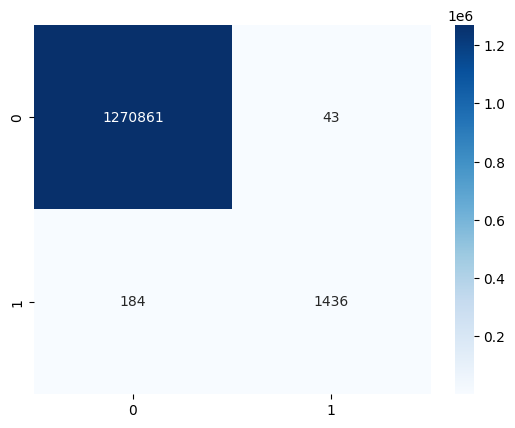

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show(cm)

__HYPERPARAMETER TUNING__

In [ ]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# params = {"n_estimators": [100, 200, 500],
#           "max_depth": [3, 5, 8],
#           "learning_rate": [0.01, 0.05, 0.1]
# }

In [ ]:
# grd = GridSearchCV(model_xgb, params, cv=5, n_jobs=-1)

In [ ]:
# grd.fit(x_train, y_train)

__SAVE MODEL__

In [ ]:
# Save model 
joblib.dump('model/model_xgb.joblib')
joblib.dump(model_xgb, 'model/fraud_detection_model.joblib')

print("✅ Model saved as fraud_detection_model.joblib")

✅ Model saved as fraud_detection_model.pkl
